In [12]:
## 1. Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [13]:
## 2. Load Dataset

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [14]:
## 3. Preprocessing Functions

def normalize(X):
    return MinMaxScaler().fit_transform(X)

def standardize(X):
    return StandardScaler().fit_transform(X)

def apply_pca(X, n_components=2):
    return PCA(n_components=n_components).fit_transform(X)

def transform_and_normalize(X):
    return normalize(standardize(X))

def transform_norm_pca(X):
    return apply_pca(transform_and_normalize(X))

In [15]:
## 4. Clustering Evaluation

def evaluate_clustering(X, labels):
    return {
        'Silhouette': round(silhouette_score(X, labels), 2),
        'Calinski-Harabasz': int(calinski_harabasz_score(X, labels)),
        'Davies-Bouldin': round(davies_bouldin_score(X, labels), 2)
    }

In [16]:
## 5. Run Clustering

def run_all_clustering(X, name):
    results = []

    # KMeans
    for k in [3, 4, 5]:
        model = KMeans(n_clusters=k, random_state=42).fit(X)
        res = evaluate_clustering(X, model.labels_)
        results.append(['KMeans', name, f'c={k}'] + list(res.values()))

    # Hierarchical
    for k in [3, 4, 5]:
        model = AgglomerativeClustering(n_clusters=k).fit(X)
        res = evaluate_clustering(X, model.labels_)
        results.append(['Hierarchical', name, f'c={k}'] + list(res.values()))

    # Mean Shift (auto bandwidth)
    try:
        ms = MeanShift(bandwidth=estimate_bandwidth(X, quantile=0.2)).fit(X)
        res = evaluate_clustering(X, ms.labels_)
        results.append(['MeanShift', name, f'c={len(np.unique(ms.labels_))}'] + list(res.values()))
    except:
        results.append(['MeanShift', name, 'c=NA', 'NA', 'NA', 'NA'])

    return results

In [11]:
## 6. All Variants of Data

variants = {
    'No Processing': X,
    'Normalized': normalize(X),
    'Transformed': standardize(X),
    'PCA': apply_pca(X),
    'T+N': transform_and_normalize(X),
    'T+N+PCA': transform_norm_pca(X)
}

all_results = []

for name, data_variant in variants.items():
    res = run_all_clustering(data_variant, name)
    all_results.extend(res)

In [17]:
## 7. Results DataFrame

results_df = pd.DataFrame(all_results, columns=['Method', 'Preprocessing', 'Clusters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])

# Display
print(results_df)

          Method  Preprocessing Clusters Silhouette Calinski-Harabasz  \
0         KMeans  No Processing      c=3       0.15               117   
1         KMeans  No Processing      c=4       0.13                96   
2         KMeans  No Processing      c=5       0.15                87   
3   Hierarchical  No Processing      c=3       0.12                95   
4   Hierarchical  No Processing      c=4       0.11                79   
5   Hierarchical  No Processing      c=5        0.1                71   
6      MeanShift  No Processing     c=NA         NA                NA   
7         KMeans     Normalized      c=3       0.31               262   
8         KMeans     Normalized      c=4       0.29               189   
9         KMeans     Normalized      c=5       0.28               150   
10  Hierarchical     Normalized      c=3       0.32               276   
11  Hierarchical     Normalized      c=4       0.21               227   
12  Hierarchical     Normalized      c=5       0.15

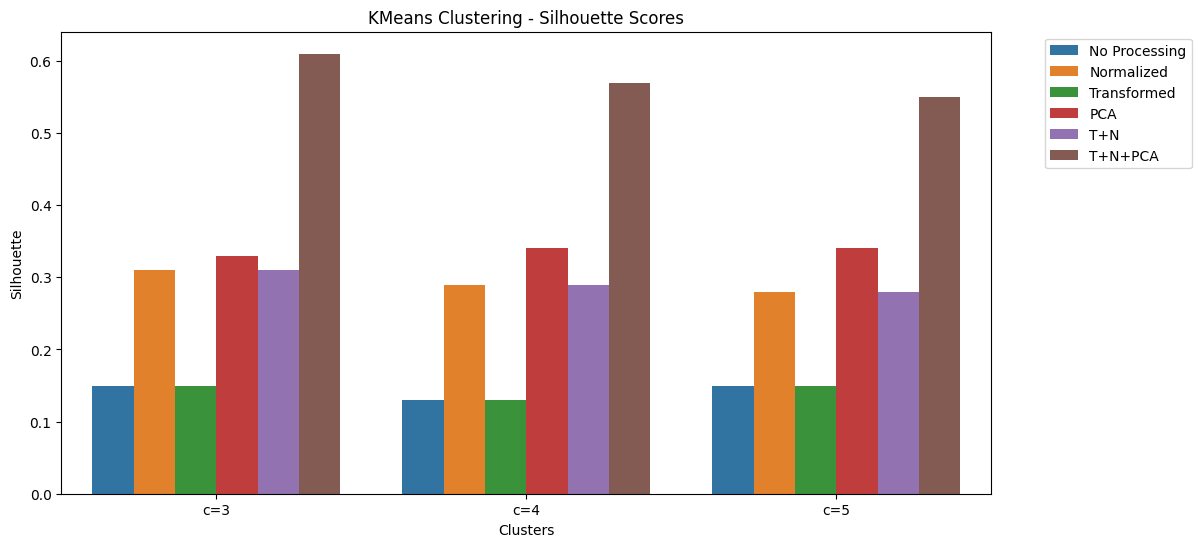

In [18]:
## 8. Visualization

plt.figure(figsize=(12,6))
sns.barplot(data=results_df[results_df['Method'] == 'KMeans'], x='Clusters', y='Silhouette', hue='Preprocessing')
plt.title('KMeans Clustering - Silhouette Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()